# Assignment 1 - PS11

**Group 128**

Group details as follows


|Name|BITS Id|Contribution|
|:---|:---|:---|
|[Vinayak Nayak](https://github.com/ElisonSherton)|2021fc04135|100%|
|[Niyati Gangwal](https://github.com/NiyatiGangwal)|2021fc04140|100%|
|[Shreysi Kalra](https://github.com/shreyasi25)|2021fc04586|100%|

# Problem Statement

🏥  Diabetes dataset to predict the risk of a person given the medical parameters

## Part A

Start exploration of the data and preprocess it

### Import Libraries/Dataset

Dataset is already downloaded and saved in the local disk in the same relative path as this notebook.

In [1]:
# Install necessary libraries quietly and update them to the latest version if already present
!pip install -q --upgrade pandas numpy matplotlib seaborn scikit-learn

In [2]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split

### Data Visualization and Exploration

<div class="alert alert-block alert-info" style="color:gray">Read the dataset. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.</div>



In [3]:
df = pd.read_excel("./diabetes.xlsx")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0


<div class="alert alert-block alert-info" style="color:gray">Print the description and Basic statistical details.</div>

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

***From: Kaggle.com PIMA Indians Diabetes Dataset***

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<div class="alert alert-block alert-info" style="color:gray">Print each class label count (Activity) and create a pie chart for each class (% of data distribution). <br> Write your observation on data balancing</div>

In [5]:
df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

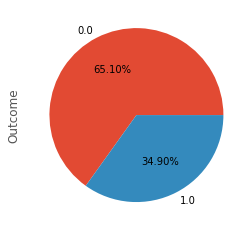

In [6]:
df.Outcome.value_counts().plot.pie(autopct="%.2f%%");

**Observation**

- Data is not balanced.
- We have higher proportion of healthier ladies i.e. non-diabetic ladies as opposed to diabetic ones.
- We might have to try some over/undersampling techniques to overcome this difference but the given dataset is not so severly unbalanced as well.
- Also it will be a good idea to perform split based on outcome such that we're stratifying to have equal distributions of 0/1s in both the training and validation sets.

<div class="alert alert-block alert-info" style="color:gray">Try exploring the data and see what insights can be drawn from the dataset.</div>

All our predictors are continuous numerical variables. Also, luckily we only have 8 predictors, so let us plot

- A scatterplot of every feature against every other feature and color it based on the outcome variable
- A Histogram of each numerical feature individually to understand the distribution of every feature but colored by outcome

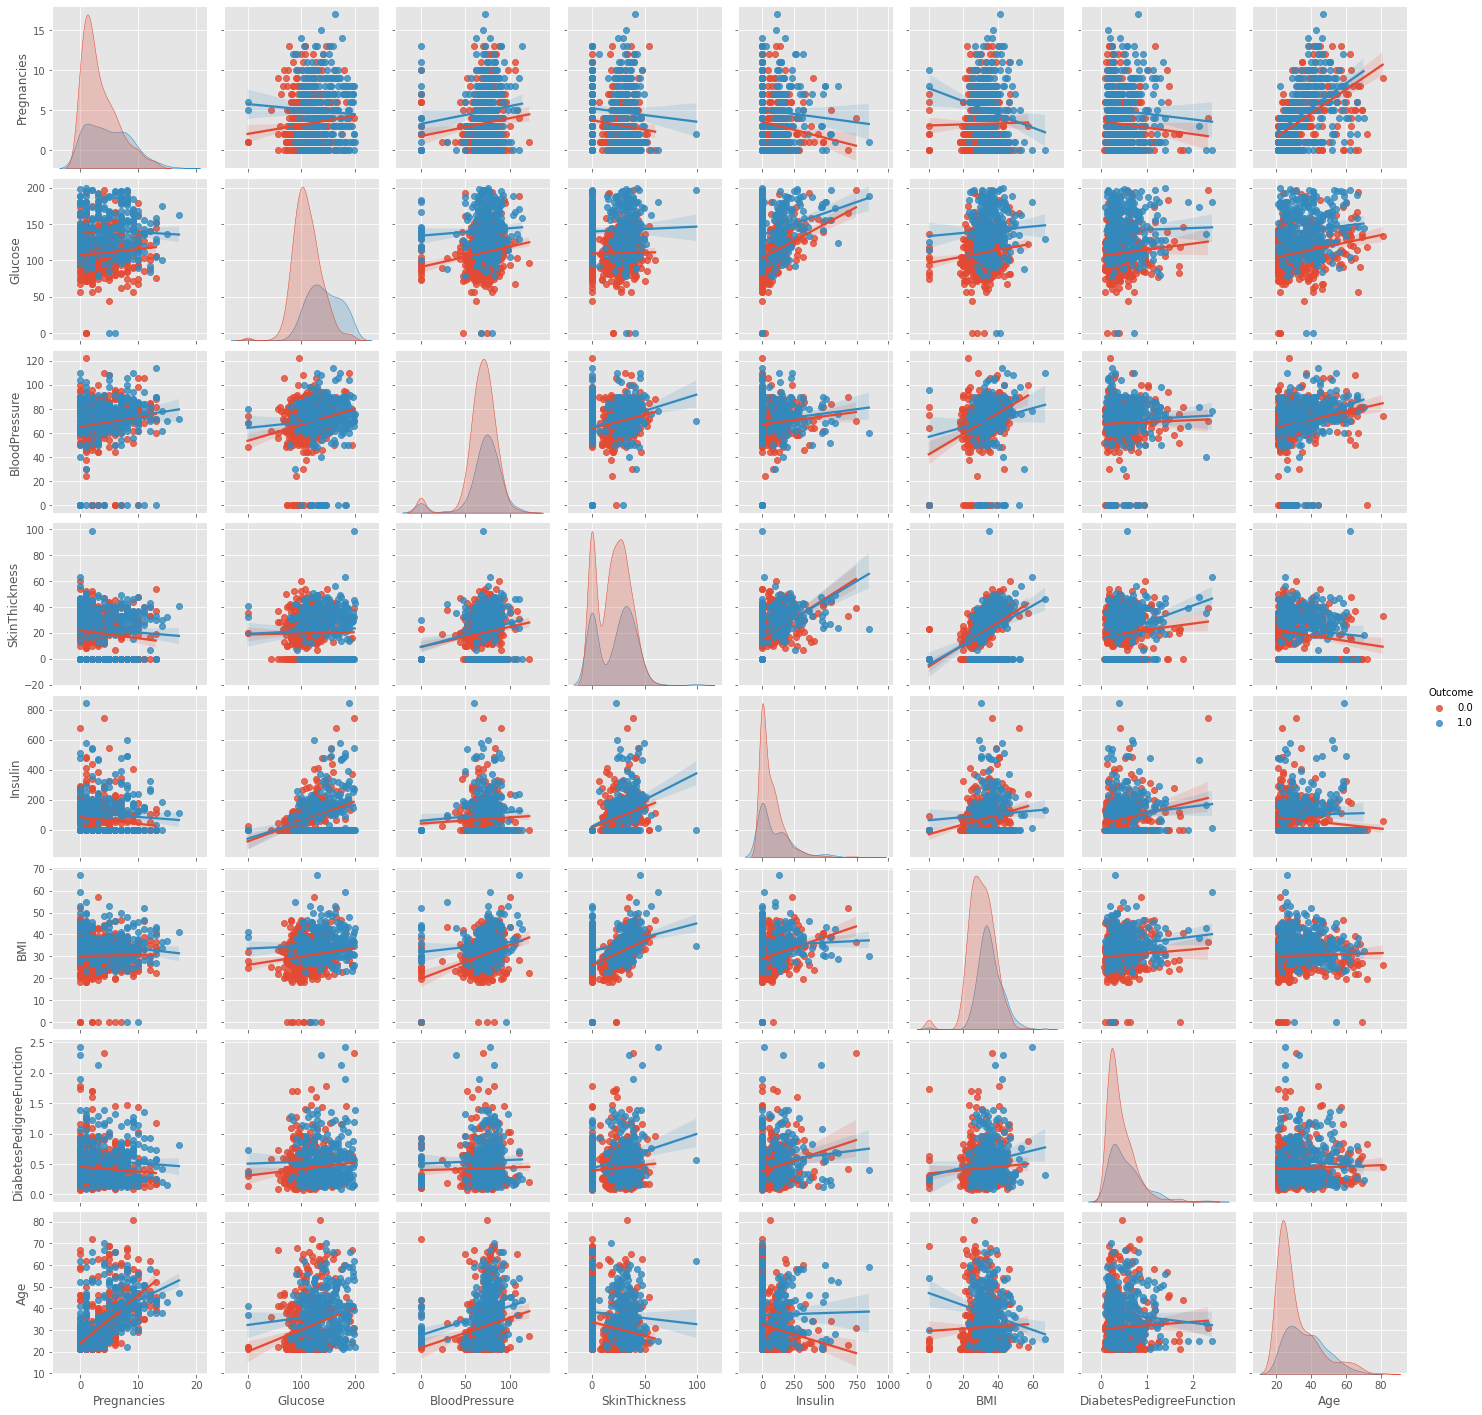

In [7]:
sns.pairplot(df, hue = "Outcome", diag_kind="kde", kind="reg", height = 2.5);

We can observe the following from above

<div class="alert alert-warning" style="color: gray;">
<ul>
    <li> <b>The distributions of the individual features colored by outcomes are almost overlapping.</b> This means that just by conditioning on any one feature, we would not get substantial information about the outcome feature.</li>
<li> For all the pairplots, we can see that the regression lines for both the red and blue i.e. 0 and 1 classes respectively are almost parallel and close to each other.</li>
<li> <b>Every feature has outliers</b> which is evident from how the shape of regression lines in the pairplots are influenced because of them (look at CIs of lines).</li>
<li> Although the features don't have any null values, <b>there's a high chance that the missing values are encoded to be 0s</b> in some cases `eg. BMI, Blood Pressure` etc. cannot technically be zeros for any living human being. </li>
</ul>
</div>

### Data Pre-processing and cleaning 



<div class="alert alert-info" style="color: gray;">
Do the appropriate preprocessing steps<br>Identify NULL or Missing Values based on column<br>Apply appropriate feature engineering techniques for them.
</div>

In [8]:
df[df != 0].isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

We can observe that there's some alarming and some reasonable observations here

<div class="alert alert-danger" style="color: gray;">
    <b>Alarming Observations</b>
    <ul>
    <li>5 people had 0 glucose levels which is not possible for a living human being.</li>
    <li>35 records show BloodPressure of zero which is impossible for a living human being.</li> 
    <li>BMI of any human can't be zero because no human is weightless or has infinite height which is the case in 11 records.</li>
    <li>227 records show SkinThickness (triceps skin fold thickness) of 0 mm; this is usually 12 mm in males and 23 mm in females. So these are also anomalies.</li>
    </ul>
</div>

<div class="alert alert-success" style="color: gray;">
    <b>Reasonable Observations</b>
    <ul>
    <li>111 records have zero pregnancies. This dataset is of females over 21 years of age and it's possible that some women never got pregnant.</li>
    <li>374 records have zero insulin. This could be possible when a person has Type1 Diabetes so it's not an anomaly.</li>
    </ul>
</div>

In [9]:
anomalous_columns = ["Glucose", "BloodPressure", "BMI", "SkinThickness"]

In [10]:
df[anomalous_columns].describe()

,Glucose,BloodPressure,BMI,SkinThickness
count,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,31.992578,20.536458
std,31.972618,19.355807,7.884160,15.952218
min,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,27.300000,0.000000
50%,117.000000,72.000000,32.000000,23.000000
75%,140.250000,80.000000,36.600000,32.000000
max,199.000000,122.000000,67.100000,99.000000


In [11]:
df[df != 0][anomalous_columns].describe()

,Glucose,BloodPressure,BMI,SkinThickness
count,763.000000,733.000000,757.000000,541.000000
mean,121.686763,72.405184,32.457464,29.153420
std,30.535641,12.382158,6.924988,10.476982
min,44.000000,24.000000,18.200000,7.000000
25%,99.000000,64.000000,27.500000,22.000000
50%,117.000000,72.000000,32.300000,29.000000
75%,141.000000,80.000000,36.600000,36.000000
max,199.000000,122.000000,67.100000,99.000000


As we see from the above two tables, we can conclude that after removing those entries for alarming columns which are zeros, the means of all the features have shot up. This is most evident in the `SkinThickness` feature which had a lot of 0 values.

We shall therefore mark these columns with nan and then use appropriate imputation after we've performed train-valid-test split on the given dataset to avoid `Data Leakage`.

In [12]:
df[anomalous_columns] = df[anomalous_columns][df!=0]

In [13]:
# Define target and independent columns and split the data in 
# 70% - 15% - 15% ratio for train - valid - test
y = df["Outcome"]
cols = df.columns.tolist()
cols.remove("Outcome")
X = df[cols]

X_train, X_interim, y_train, y_interim = train_test_split(X, y, stratify = y,
                                                          random_state = 34,
                                                          test_size = 0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_interim, y_interim, 
                                                    stratify = y_interim,
                                                    test_size = 0.5,
                                                    random_state = 73)

In [14]:
# Look at the shapes of train, valid and test predictors
X_train.shape, X_valid.shape, X_test.shape

((537, 8), (115, 8), (116, 8))

We shall build a pipeline which will do the imputation and min-max normalization. 

This is in general a standard procedure which helps to fit a model and keep all the preprocessing steps associated with data for testing together in one object.

<div class="alert alert-info" style="color: gray;">
    Do the correlational analysis on the dataset. Provide a visualization for the same.
</div>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,-0.073535,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.331550,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,-0.047375,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.126423,0.648214,0.115016,0.166816,0.259491
Insulin,-0.073535,0.331550,-0.047375,0.126423,1.000000,0.185357,0.185071,-0.042163,0.130548
BMI,0.021719,0.232771,0.289230,0.648214,0.185357,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.185071,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,-0.042163,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.130548,0.313680,0.173844,0.238356,1.000000


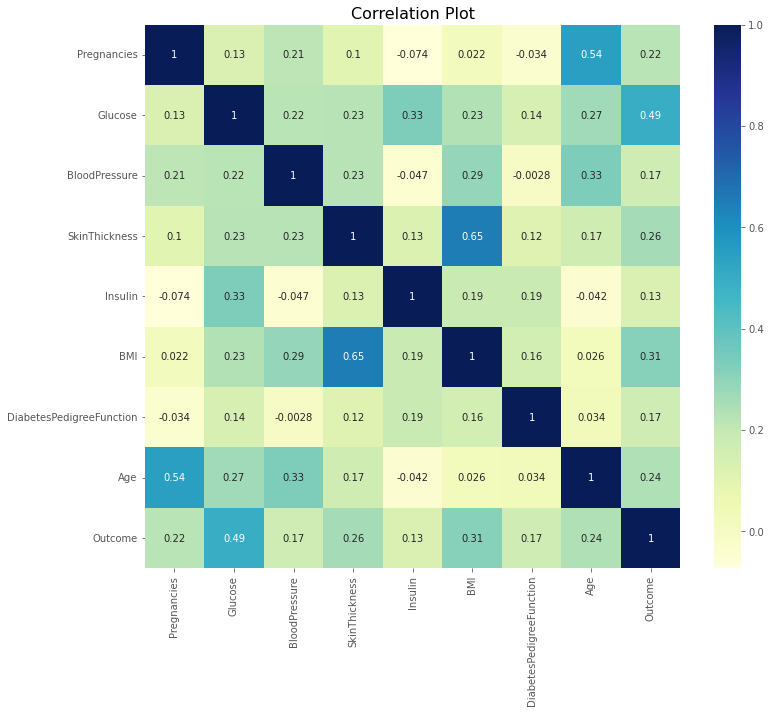

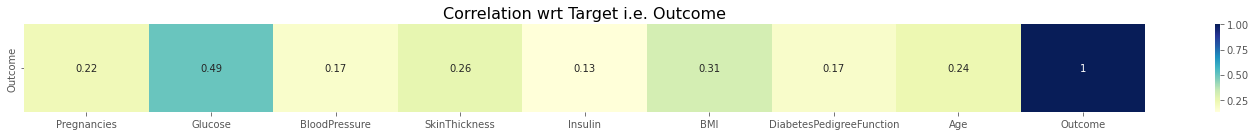

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (12,10))
display(df.corr())
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, ax = ax);
ax.set_title("Correlation Plot", fontsize = 16);

fig, ax = plt.subplots(1, 1, figsize = (20,2))
sns.heatmap(df.corr()[["Outcome"]].T ,cmap = "YlGnBu", annot=True, ax = ax);
ax.set_title("Correlation wrt Target i.e. Outcome", fontsize = 16);

plt.tight_layout();

From the correlational analysis we can say the following

We could make the following observations from above

<div class="alert alert-warning" style="color: gray;">
<ul>
    <li> Amongst all the provided features, `Outcome` is most correlated to `Glucose` levels. This is in accordance with common knowledge that diabetic patients shouldn't consume sweet items as it's high in glucose.</li>
    <li> If we look at the features themselves, `Age` and `Pregnancies` seem to be positively correlated. This is also to be expected and not out of the ordinary.</li>
    <li> `BMI` and `SkinThickness` are also correlated. Higher the BMI, more the weight as opposed to height which means these ladies would likely have more fat deposits and hence larger `SkinThickness`</li>
    <li> Among rest of the features there doesn't seem to be much correlation. Ideally speaking these correlations should be zero for us to apply Naive Bayes for classification; however we'll conveniently assume (`naively` assume) independence of features and apply `Gaussian Naive Bayes` algorithm for building a classifier.</li>
</ul>
</div>

## Part B

### Model Building
<div class="alert alert-info" style="color: gray;"><ul>
    <li> Perform Model Development using Naive Bayes with appropriate hyper parameters..</li>
    <li> Train the model and print the training accuracy, Recall, F1 Score for case 1, case 2 separately.</li>
</ul>
</div>

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [17]:
# Define the preprocessing steps
# 1. First impute all the columns wrt mean of the respective columns
# 2. Scale the features using min-max-scaler
numeric_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'mean')),
                                        ('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(transformers = [('numeric', numeric_transformer, cols)])

In [18]:
# Define the grid search object to perform fitting of our model
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Define the classifier, parameters on which to tune and metric of choice
# Choose f1 to get a balance between precision and recall 
gscv = GridSearchCV(estimator = GaussianNB(),
                    param_grid = param_grid,
                    scoring = "f1", cv = 5)

# Define the model pipeline
model_pipeline = Pipeline(steps = [("preprocessor", preprocessor),
                                   ("model", gscv)])

In [19]:
# Fit the model
model = model_pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=GaussianNB(),
                              param_grid={'var_smoothing': array([1.  

In [20]:
# Look at the best parameters
model.steps[1][1].best_params_

{'var_smoothing': 0.2848035868435802}

In [21]:
# Look at the best score
model.steps[1][1].best_score_

0.6165559934369138

In [22]:
# Predict on the training data
y_pred_train = model.predict(X_train)

In [23]:
# Get all the different metrics requested for
def get_stats(y_trues, y_preds, pos_label):
    acc = accuracy_score(y_trues, y_preds)
    rec = recall_score(y_trues, y_preds, pos_label = pos_label)
    f1 = f1_score(y_trues, y_preds, pos_label = pos_label)
    prc = precision_score(y_trues, y_preds, pos_label = pos_label)
    return (acc, rec, prc, f1)

train_0_metrics = get_stats(y_train, y_pred_train, pos_label = 0)
train_1_metrics = get_stats(y_train, y_pred_train, pos_label = 1)

**Case1**

In [24]:
# Print the statistics for train data in %
pd.Series(train_0_metrics, index = ["Accuracy", "Recall", "Precision", "F1-Score"], name = "Train Class 0 Metrics") * 100

Accuracy     76.722533
Recall       89.142857
Precision    78.195489
F1-Score     83.311081
Name: Train Class 0 Metrics, dtype: float64

**Case2**

In [25]:
# Print the statistics for train data in %
pd.Series(train_1_metrics, index = ["Accuracy", "Recall", "Precision", "F1-Score"], name = "Train Class 1 Metrics") * 100

Accuracy     76.722533
Recall       53.475936
Precision    72.463768
F1-Score     61.538462
Name: Train Class 1 Metrics, dtype: float64

We observe that on the training data, using `Gaussian Naive Bayes algorithm`

<div class="alert alert-warning" style="color: gray;">
    <ul>
        <li>We are able to get an <b>accuracy of 76% </b>which is much better than just random guessing.</li>
        <li>However, because our training data has more number of 0s than 1s, we can see from other metrics like precision/recall/f1-score that our <i>model is able to identify class 0 i.e. the more frequent class better than class 1 which is less frequent.</i></li>
    </ul>
</div>

### Performance Evaluation
<div class="alert alert-info" style="color: gray;">
<ul>
    <li> Do the prediction for the test data and display the results for the inference.</li>
    <li> Print test Accuracy, Recall, F1 Score for case 1 and case 2 separately..</li>
    <li> Print the confusion matrix for all cases. Provide insights on the most suitable matrix in this case.</li>
    <li> Compare the accuracy of train data with test data. Provide appropriate analysis for the same for all cases.</li>
    <li> Write your observation for result of each question and justify your answer.</li>
</ul>
</div>

In [26]:
# Find validation set predictions and display them
y_pred_val = model.predict(X_valid)
print(f"True values:\n{y_valid.astype(int).tolist()}")
print(f"Predicions:\n{y_pred_val.astype(int).tolist()}")

True values:
[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
Predicions:
[0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [27]:
# Find Test set predictions and display them
y_pred_test = model.predict(X_test)
print(f"True values:\n{y_test.astype(int).tolist()}")
print(f"Predicions:\n{y_pred_test.astype(int).tolist()}")

True values:
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
Predicions:
[1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]


**Test Set Metrics for the two cases**

In [28]:
test_0_metrics = get_stats(y_test, y_pred_test, pos_label = 0)
test_1_metrics = get_stats(y_test, y_pred_test, pos_label = 1)

**Case 0**

In [29]:
# Print the statistics for train data in %
pd.Series(test_0_metrics, index = ["Accuracy", "Recall", "Precision", "F1-Score"], name = "Test Class 0 Metrics") * 100

Accuracy     76.724138
Recall       85.333333
Precision    80.000000
F1-Score     82.580645
Name: Test Class 0 Metrics, dtype: float64

**Case 1**

In [30]:
# Print the statistics for train data in %
pd.Series(test_1_metrics, index = ["Accuracy", "Recall", "Precision", "F1-Score"], name = "Test Class 1 Metrics") * 100

Accuracy     76.724138
Recall       60.975610
Precision    69.444444
F1-Score     64.935065
Name: Test Class 1 Metrics, dtype: float64

**Confusion Matrix for train data for class 0 and class 1**

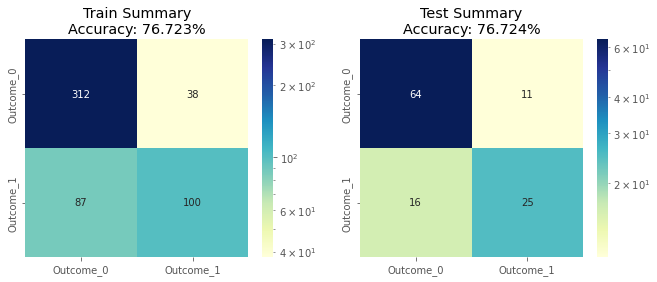

In [31]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 2, figsize = (11, 4))

names = ["Outcome_0", "Outcome_1"]
sns.heatmap(confusion_matrix(y_train, y_pred_train), cmap = "YlGnBu", annot=True, ax = ax[0], 
            fmt="d", xticklabels = names, yticklabels = names, norm = LogNorm())
sns.heatmap(confusion_matrix(y_test, y_pred_test), cmap = "YlGnBu", annot=True, ax = ax[1], 
            fmt="d", xticklabels = names, yticklabels = names, norm = LogNorm())

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

ax[0].set_title(f"Train Summary\nAccuracy: {train_acc*100:.3f}%")
ax[1].set_title(f"Test Summary\nAccuracy: {test_acc*100:.3f}%");

<div class="alert alert-warning" style="color: gray;">
    <ul>
<li> Accuracy is a holistic measure which does not depend on the class/case. So we have only one accuracy for a given set.</li>
<li> In this example, we see that both the train and test accuracies are very comparable to each other i.e. both ~76%.</li>
<li> However on diving deeper we can see that our classifier is better at figuring out instances of `Outcome_0` more often than `Outcome_1`. This is to be expected and attributed to the presence of imbalance in labels in the training data.</li>
    </ul>
</div>

In [32]:
# Finally print the overall results in a tabular form
train_metrics = get_stats(y_train, y_pred_train, 1)
valid_metrics = get_stats(y_valid, y_pred_val, 1)
test_metrics = get_stats(y_test, y_pred_test, 1)

pd.DataFrame([train_metrics, valid_metrics, test_metrics], 
             columns = ["Accuracy", "Recall", "Precision", "F1-Score"],
             index = ["Train", "Valid", "Test"])

,Accuracy,Recall,Precision,F1-Score
Train,0.767225,0.534759,0.724638,0.615385
Valid,0.730435,0.500000,0.645161,0.563380
Test,0.767241,0.609756,0.694444,0.649351


# References

1. [sklearn Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
2. [seaborn plotting API](https://seaborn.pydata.org/api.html#)
3. [UCI ML PIMA Indians Diabetes data](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
4. Tom Mitchell - Ch 6 Bayesian Learning 